In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# importing dataset
data=pd.read_csv('uber.csv')

In [3]:
data.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [4]:
data.shape

(200000, 9)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [6]:
data.drop(['Unnamed: 0','key'], axis=1, inplace=True)

In [7]:
data.dtypes

fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [8]:
data.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
mean,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535
std,9.901776,11.437787,7.720539,13.117408,6.794829,1.385997
min,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


In [9]:
data.isnull().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [10]:
data.dropna(axis=0, inplace=True)

In [11]:
data.isnull().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [12]:
data.pickup_datetime=pd.to_datetime(data.pickup_datetime, errors='coerce')

In [13]:
data.dtypes

fare_amount                      float64
pickup_datetime      datetime64[ns, UTC]
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                    int64
dtype: object

In [14]:
data=data.assign(hour=data.pickup_datetime.dt.hour,
                 day=data.pickup_datetime.dt.day,
                 month=data.pickup_datetime.dt.month,
                 year=data.pickup_datetime.dt.year,
                 dayofweek=data.pickup_datetime.dt.dayofweek)

In [15]:
data.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,dayofweek
0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,19,7,5,2015,3
1,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,20,17,7,2009,4
2,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,21,24,8,2009,0
3,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,8,26,6,2009,4
4,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,17,28,8,2014,3


now we are going to use Heversine formula to calculate the distance between two points and journey , 
using the longitude and latitude

In [16]:
from math import *

# Heversine formula
hav(θ) = sin**2(θ/2).

In [17]:
def distance_transform(longitude1, latitude1, longitude2, latitude2):
    travel_dist = []
    
    for pos in range(len(longitude1)):
        long1,lati1,long2,lati2 = map(radians,[longitude1[pos],latitude1[pos],longitude2[pos],latitude2[pos]])
        dist_long = long2 - long1
        dist_lati = lati2 - lati1
        a = sin(dist_lati/2)**2 + cos(lati1) * cos(lati2) * sin(dist_long/2)**2
        c = 2 * asin(sqrt(a))*6371
        travel_dist.append(c)
       
    return travel_dist

In [18]:
data['dist_travel_km'] = distance_transform(data['pickup_longitude'].to_numpy(),
                                                data['pickup_latitude'].to_numpy(),
                                                data['dropoff_longitude'].to_numpy(),
                                                data['dropoff_latitude'].to_numpy()
                                              )

In [19]:
data.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,dayofweek,dist_travel_km
0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,19,7,5,2015,3,1.683323
1,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,20,17,7,2009,4,2.457590
2,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,21,24,8,2009,0,5.036377
3,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,8,26,6,2009,4,1.661683
4,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,17,28,8,2014,3,4.475450


In [20]:
len(data.pickup_longitude)

199999

In [21]:
data=data.drop('pickup_datetime', axis=1)

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199999 entries, 0 to 199999
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   fare_amount        199999 non-null  float64
 1   pickup_longitude   199999 non-null  float64
 2   pickup_latitude    199999 non-null  float64
 3   dropoff_longitude  199999 non-null  float64
 4   dropoff_latitude   199999 non-null  float64
 5   passenger_count    199999 non-null  int64  
 6   hour               199999 non-null  int64  
 7   day                199999 non-null  int64  
 8   month              199999 non-null  int64  
 9   year               199999 non-null  int64  
 10  dayofweek          199999 non-null  int64  
 11  dist_travel_km     199999 non-null  float64
dtypes: float64(6), int64(6)
memory usage: 19.8 MB


In [23]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
fare_amount,199999.0,11.359892,9.901760,-52.000000,6.000000,8.500000,12.500000,499.000000
pickup_longitude,199999.0,-72.527631,11.437815,-1340.648410,-73.992065,-73.981823,-73.967154,57.418457
pickup_latitude,199999.0,39.935881,7.720558,-74.015515,40.734796,40.752592,40.767158,1644.421482
dropoff_longitude,199999.0,-72.525292,13.117408,-3356.666300,-73.991407,-73.980093,-73.963658,1153.572603
dropoff_latitude,199999.0,39.923890,6.794829,-881.985513,40.733823,40.753042,40.768001,872.697628
passenger_count,199999.0,1.684543,1.385995,0.000000,1.000000,1.000000,2.000000,208.000000
hour,199999.0,13.491387,6.515505,0.000000,9.000000,14.000000,19.000000,23.000000
day,199999.0,15.704739,8.687377,1.000000,8.000000,16.000000,23.000000,31.000000
month,199999.0,6.281791,3.438933,1.000000,3.000000,6.000000,9.000000,12.000000
year,199999.0,2011.742434,1.856400,2009.000000,2010.000000,2012.000000,2013.000000,2015.000000


C:\Users\BRUCE WAYNE\Documents\all about anaconda real\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='pickup_longitude'>

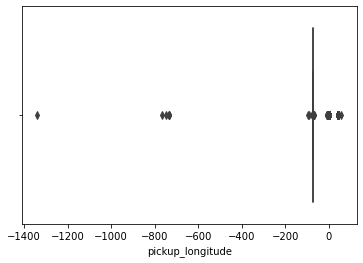

In [24]:
sns.boxplot(data['pickup_longitude'])

<AxesSubplot:>

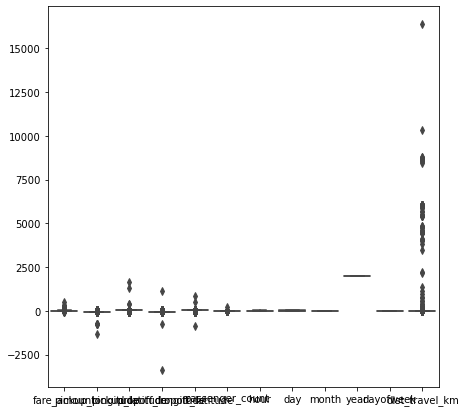

In [25]:
plt.figure(figsize=(7,7))
sns.boxplot(data= data)

In [26]:
data.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,dayofweek,dist_travel_km
count,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000
mean,11.359892,-72.527631,39.935881,-72.525292,39.923890,1.684543,13.491387,15.704739,6.281791,2011.742434,3.048435,20.855350
std,9.901760,11.437815,7.720558,13.117408,6.794829,1.385995,6.515505,8.687377,3.438933,1.856400,1.946946,382.964642
min,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000,0.000000,1.000000,1.000000,2009.000000,0.000000,0.000000
25%,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000,9.000000,8.000000,3.000000,2010.000000,1.000000,1.215222
50%,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000,14.000000,16.000000,6.000000,2012.000000,3.000000,2.120992
75%,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000,19.000000,23.000000,9.000000,2013.000000,5.000000,3.875169
max,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000,23.000000,31.000000,12.000000,2015.000000,6.000000,16409.239135


In [27]:
data=data[(data.dist_travel_km > 0 ) & (data.dist_travel_km < 130)]
data

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,dayofweek,dist_travel_km
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,19,7,5,2015,3,1.683323
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,20,17,7,2009,4,2.457590
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,21,24,8,2009,0,5.036377
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,8,26,6,2009,4,1.661683
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5,17,28,8,2014,3,4.475450
...,...,...,...,...,...,...,...,...,...,...,...,...
199995,3.0,-73.987042,40.739367,-73.986525,40.740297,1,10,28,10,2012,6,0.112210
199996,7.5,-73.984722,40.736837,-74.006672,40.739620,1,1,14,3,2014,4,1.875050
199997,30.9,-73.986017,40.756487,-73.858957,40.692588,2,0,29,6,2009,0,12.850319
199998,14.5,-73.997124,40.725452,-73.983215,40.695415,1,14,20,5,2015,2,3.539715


In [28]:
data.dist_travel_km.max()

129.6100937611333

In [29]:
data.dist_travel_km.min()

8.419568071893166e-05

In [30]:
incorrect_coordinates = data.loc[(data.pickup_latitude > 90) |(data.pickup_latitude < -90) |
                                   (data.dropoff_latitude > 90) |(data.dropoff_latitude < -90) |
                                   (data.pickup_longitude > 180) |(data.pickup_longitude < -180) |
                                   (data.dropoff_longitude > 90) |(data.dropoff_longitude < -90)
                                    ]

In [31]:
incorrect_coordinates

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,dayofweek,dist_travel_km
61793,8.5,-73.951385,401.066667,-73.98211,40.754117,1,5,13,6,2012,2,34.84975


In [32]:
len([-73.25])

1

In [33]:
data.drop(incorrect_coordinates, inplace = True, errors = 'ignore')

In [34]:
corr=data.corr()
corr

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,dayofweek,dist_travel_km
fare_amount,1.000000,0.011739,-0.008359,0.010258,-0.008369,0.011914,-0.020709,0.000107,0.024404,0.120365,0.006575,0.789936
pickup_longitude,0.011739,1.000000,-0.949081,0.999875,-0.993960,0.009168,0.001841,0.019523,-0.007476,0.013443,0.008238,0.005131
pickup_latitude,-0.008359,-0.949081,1.000000,-0.949084,0.954748,-0.009219,-0.001817,-0.019357,0.007602,-0.013696,-0.008914,0.002931
dropoff_longitude,0.010258,0.999875,-0.949084,1.000000,-0.993946,0.009164,0.000949,0.019544,-0.007442,0.013339,0.008527,0.004103
dropoff_latitude,-0.008369,-0.993960,0.954748,-0.993946,1.000000,-0.009264,-0.001022,-0.020076,0.007991,-0.014351,-0.008916,-0.002280
passenger_count,0.011914,0.009168,-0.009219,0.009164,-0.009264,1.000000,0.013344,0.003595,0.009985,0.005160,0.033807,0.005053
hour,-0.020709,0.001841,-0.001817,0.000949,-0.001022,0.013344,1.000000,0.005348,-0.004234,0.001890,-0.086209,-0.027476
day,0.000107,0.019523,-0.019357,0.019544,-0.020076,0.003595,0.005348,1.000000,-0.017005,-0.012371,0.005004,-0.001129
month,0.024404,-0.007476,0.007602,-0.007442,0.007991,0.009985,-0.004234,-0.017005,1.000000,-0.115491,-0.008902,0.008026
year,0.120365,0.013443,-0.013696,0.013339,-0.014351,0.005160,0.001890,-0.012371,-0.115491,1.000000,0.006022,0.019209


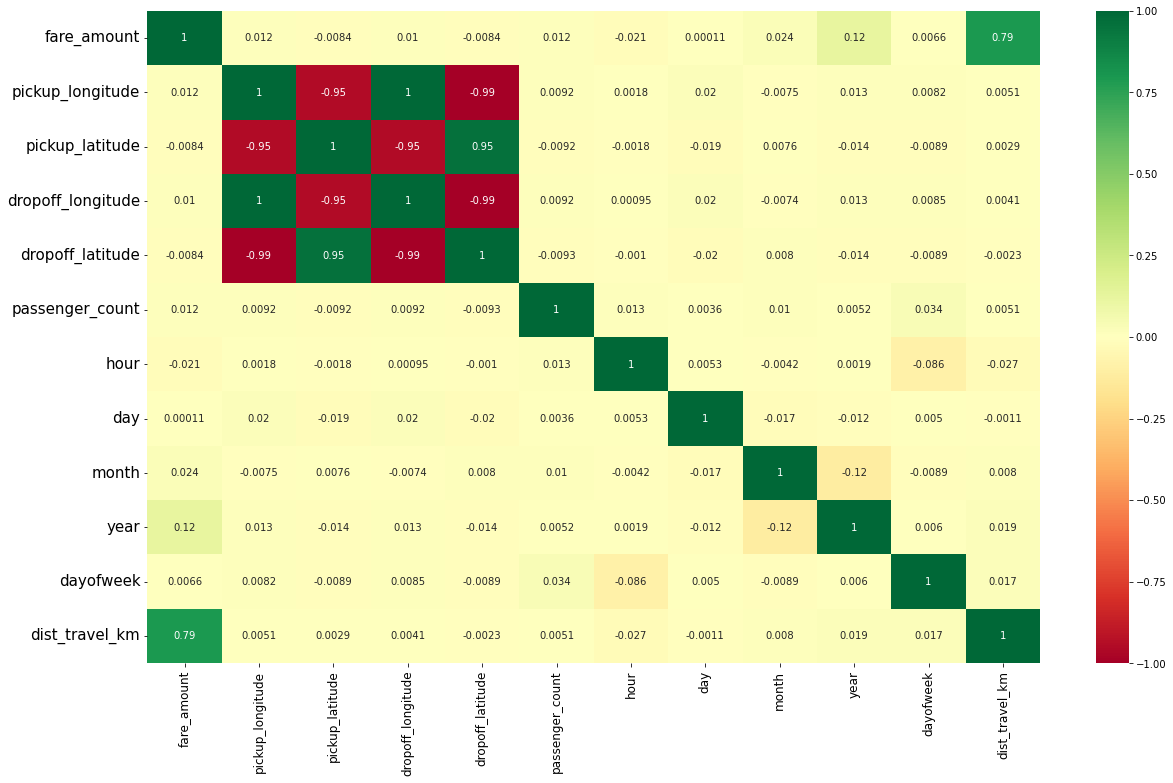

In [35]:
# plot the heat map
# corr: give the correlation matrix
# cmap: color code used for plotting
# vmax: gives a maximum range of values for the chart
# vmin: gives a minimum range of values for the chart
# annot: prints the correlation values in the chart
# annot_kws: sets the font size of the annotation
# mask: mask the upper traingular matrix values
f,ax=plt.subplots(figsize=(20,12))
sns.heatmap(data.corr(), cmap = 'RdYlGn', vmax = 1.0, vmin = -1.0, annot = True)
plt.xticks(fontsize = 12)            #increase or decrease the font size of x
plt.yticks(fontsize = 15)            #increase or decrease the font size of x
plt.show()

In [36]:
data.dayofweek.value_counts()

4    29932
5    29370
3    29121
2    28134
1    27303
6    25629
0    24433
Name: dayofweek, dtype: int64

#  we are going to check the peak hours during the weekdays

# 1. plotting the countplot to see the peak hours during weekdays

<AxesSubplot:title={'center':'Cab trips count during week days'}, xlabel='hour', ylabel='count'>

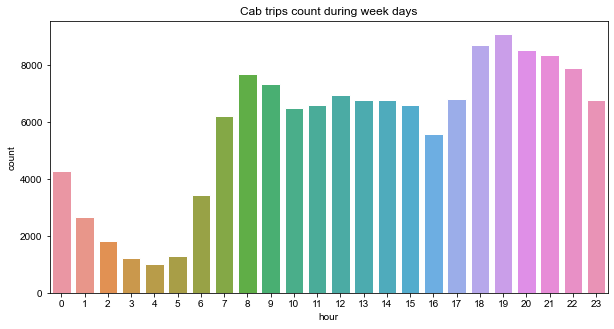

In [37]:
plt.figure(figsize=(10,5))
plt.title('Cab trips count during week days')
sns.set_style("white")
sns.countplot(x='hour', data= data[(data.dayofweek >= 0) & (data.dayofweek <= 4)])

# 2. plotting a countplot to see the peak hours during weekends

<AxesSubplot:title={'center':'Cab trips count during week days'}, xlabel='hour', ylabel='count'>

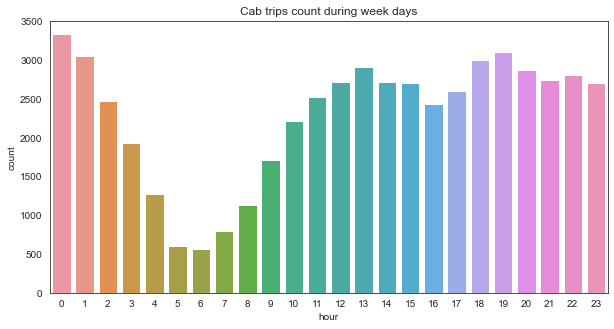

In [38]:
plt.figure(figsize=(10,5))
plt.title('Cab trips count during week days')
sns.set_style("white")
sns.countplot(x='hour', data=data[(data.dayofweek >= 5) & (data.dayofweek <=6)])

#  Finding out the mean fare on hourly basis on weekdays and weekends

In [39]:
# Set the days in the dataset as week days and week ends
week_days = data.loc[(data.dayofweek >= 0) & (data.dayofweek <= 4)]
week_ends = data.loc[(data.dayofweek >= 5) & (data.dayofweek <= 6)]

# compute the mean fare amount over the week day and week end.
# use groupby('hour') to get the mean fare for each hour
week_days_fare = week_days.groupby(['hour']).fare_amount.mean().to_frame().reset_index()
week_ends_fare = week_ends.groupby(['hour']).fare_amount.mean().to_frame().reset_index()

In [40]:
# hours
x = np.array(week_days_fare.hour)
# an array of week day fare 
y = np.array(week_days_fare.fare_amount)
# an array of week end fare
z = np.array(week_ends_fare.fare_amount)

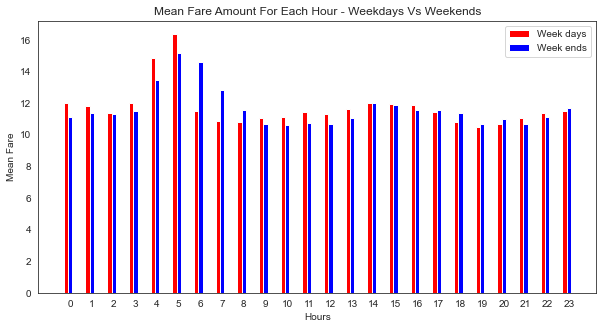

In [41]:
# Set the figure size, title, x and y labels
plt.figure(figsize = (10,5))
plt.title('Mean Fare Amount For Each Hour - Weekdays Vs Weekends')
plt.xlabel('Hours')
plt.ylabel('Mean Fare')
# Pass the three integers. The value of these integer should be less that 10
ax=plt.subplot(1,1,1)
ax.bar(x-0.2, y, width=0.2, color='red', align='center', label = 'Week days')
ax.bar(x, z, width=0.2, color='blue', align='center', label = 'Week ends')
plt.xticks(range(0,24))
plt.legend()
plt.show()

# Distribution of key numerical vairables¶

#   distibution of  'fare amount'

<AxesSubplot:title={'center':'Distribution of the fare amount'}, xlabel='Fare Amount', ylabel='Frequency'>

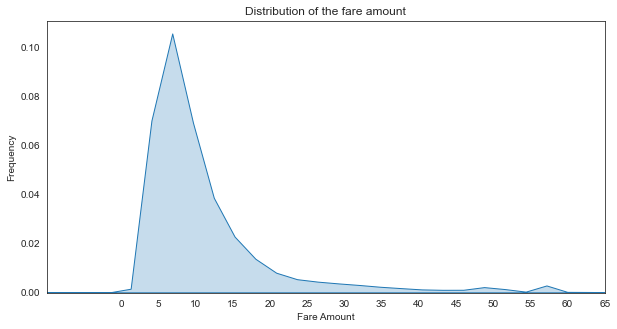

In [42]:
plt.figure(figsize=(10,5))
plt.title("Distribution of the fare amount")
plt.xlabel("Fare Amount")
plt.ylabel("Frequency")
sns.set_style("white")
plt.xlim(-10,20)
# to increase the  values on x-axis
plt.xticks(range(0,70,5))
sns.kdeplot(data.fare_amount, shade=True)

<AxesSubplot:title={'center':'Distribution of the trip distance'}, xlabel='Distance(Km)', ylabel='Frequency'>

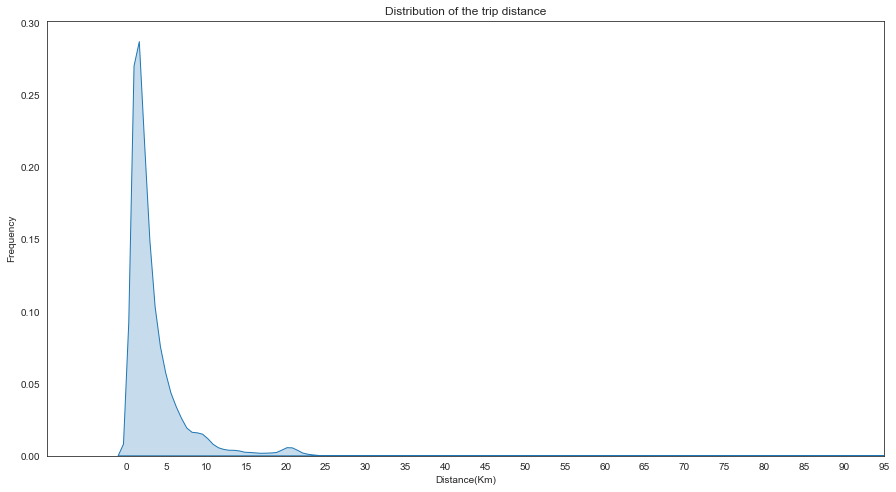

In [43]:
plt.figure(figsize=(15,8))
plt.title("Distribution of the trip distance")
plt.xlabel("Distance(Km)")
plt.ylabel("Frequency")
plt.xlim(-10,20)
plt.xticks(range(0, 100, 5))
sns.set_style = 'white'
sns.kdeplot(data[data.dist_travel_km < 600].dist_travel_km, shade= True)

We can see that most the trips have a travel distance of 2.5 km to 25 km. There are a few instances of 0 km as well.



# Model

In [44]:
data.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,dayofweek,dist_travel_km
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,19,7,5,2015,3,1.683323
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,20,17,7,2009,4,2.457590
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,21,24,8,2009,0,5.036377
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,8,26,6,2009,4,1.661683
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5,17,28,8,2014,3,4.475450


In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 193922 entries, 0 to 199999
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   fare_amount        193922 non-null  float64
 1   pickup_longitude   193922 non-null  float64
 2   pickup_latitude    193922 non-null  float64
 3   dropoff_longitude  193922 non-null  float64
 4   dropoff_latitude   193922 non-null  float64
 5   passenger_count    193922 non-null  int64  
 6   hour               193922 non-null  int64  
 7   day                193922 non-null  int64  
 8   month              193922 non-null  int64  
 9   year               193922 non-null  int64  
 10  dayofweek          193922 non-null  int64  
 11  dist_travel_km     193922 non-null  float64
dtypes: float64(6), int64(6)
memory usage: 23.3 MB


In [46]:
features=data.drop(['fare_amount'], axis=1)
target=data[['fare_amount']]

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
x_train, x_test, y_train, y_test=train_test_split(features, target, train_size=0.75, random_state=10)

In [49]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((145441, 11), (48481, 11), (145441, 1), (48481, 1))

# DecisionTreeClassifier

In [54]:
from sklearn.tree import DecisionTreeRegressor

In [78]:
my_model=DecisionTreeRegressor(random_state=2, max_depth = 1)

In [79]:
my_model.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=1, random_state=2)

#### using Gridsearch

In [80]:
from sklearn.model_selection import GridSearchCV

In [82]:
params = {'max_depth':[1,2,3,4,5], 'splitter':['best','random']}

In [83]:
gridsearch=GridSearchCV(my_model, params, cv= 3, n_jobs= -1)

In [84]:
gridsearch.fit(x_train, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeRegressor(max_depth=1, random_state=2),
             n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 4, 5],
                         'splitter': ['best', 'random']})

In [85]:
gridsearch.best_params_

{'max_depth': 5, 'splitter': 'best'}

In [86]:
my_model=DecisionTreeRegressor(random_state=2, max_depth = 5, splitter = 'best')

In [87]:
my_model.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=5, random_state=2)

In [88]:
y_pred=my_model.predict(x_test)

In [95]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [90]:
mean_squared_error(y_test, y_pred)

22.213317165771866

In [91]:
sqrt(mean_squared_error(y_test, y_pred))

4.713100589396737

In [92]:
mean_absolute_error(y_test, y_pred)

2.3044501840576013

In [96]:
r2_score(y_test, y_pred)

0.7710853001154824

# RandomForestRegressor

In [97]:
from sklearn.ensemble import RandomForestRegressor

In [98]:
my_model_rf=RandomForestRegressor(n_estimators=100, random_state=10)

In [99]:
my_model_rf.fit(x_train, y_train)

C:\Users\BRUCEW~1\AppData\Local\Temp/ipykernel_12536/2151359281.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  my_model_rf.fit(x_train, y_train)


RandomForestRegressor(random_state=10)

In [101]:
y_pred=my_model_rf.predict(x_test)

In [102]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [103]:
mean_squared_error(y_pred, y_test)

16.844394735760403

In [104]:
sqrt(mean_squared_error(y_pred, y_test))

4.104192336594425

In [105]:
mean_absolute_error(y_pred, y_test)

1.7658187949918522

In [106]:
r2_score(y_pred, y_test)

0.7918056818886688